# Problema

"In a square there are $n$ red and $n$ blue points. We connect one red and one blue point by an interval, the weight of this connection (matching) is the distance between them. The aim is to match any red point with blue one such that a total weight of matching should be minimal."

Fonte: https://www.ime.usp.br/~yambar/MAE5704/Aula10SimulatedAnnealing/aula10slidesE.pdf


# Solução com Simulated Annealing

A técnica Simulated Annealing utiliza o algoritmo Metropolis-Hasting a fim de maximizar ou minimizar uma função complicada que pode ter vários máximos/mínimos locais. Neste exercício utilizaremos $n=500$ como o número de bolas de cada uma das cores e o lado do quadrado $l=1$. Iniciamente, para cada uma das bolas azuis, designaremos uma bola vermelha ao acaso. Para 'otimizar' esse sistema, definiremos uma função perda que é a soma de todas as distâncias euclidianas entre as bolas azuis e seus respectivos pares, sendo que nosso objetivo é minimizar essa função. Se $\mathbf{A^{(0)}}=(a^{(0)}_{ij})$ é uma matriz $n~x~2$ com as coordenadas iniciais de cada uma das bolas azuis e a matriz $\mathbf{V^{(0)}}=(v^{(0)}_{ij})$ é o análogo para as bolsas vermelhas, vamos definir nossa função perda inicial, com $t=0$, da seguinte maneira:

\begin{equation}
    L(A^{(0)},V^{(t)})=\sum_{i=1}^{n}\sqrt{(a^{(0)}_{i1}-v^{(t)}_{i1})^2+(a^{(0)}_{i2}-v^{(t)}_{i2})^2}
\end{equation}

A cada iteração do algoritmo, invertemos as posições de duas das linhas da matriz $\mathbf{V^{(t)}}$ afim de obter a matriz $\mathbf{V^{(c)}}$ que é uma matriz candidata e que será aceita com probabilidade:

\begin{equation}
    \alpha(\mathbf{V^{(c)}},\mathbf{V^{(t)}})=\text{min} \Bigg (1, \text{exp} \Big (\beta_t L(A^{(0)},V^{(c)})-\beta_tL(A^{(0)},V^{(t)}) \Big )   \Bigg )
\end{equation}

Se a matriz for aceita, definimos $V^{(t+1)}=V^{(c)}$, se ela não for, definimos $V^{(t+1)}=V^{(t)}$. Repetimos as iterações até uma regra de parada, sempre deixando a matriz das coordenadas das bolas azuis estática e permutando as linhas da matriz das coordenadas das bolas vermelhas. $\beta_t$, por sua vez, é definida da seguinte maneira, de acordo com a *Cooling Schedule*:

\begin{equation}
    \beta_t=-\frac{t}{k}
\end{equation}

Sendo que $k$ é uma constante arbitrária definida com base em testes. Vamos à codificação:

Abrindo as bibliotecas:

In [1040]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy 

Criando as matrizes iniciais com as coordenadas das bolas e mais algumas especificações:

In [1041]:
#Lado do quadrado
l=1

#Número de bolas de cada cor
n=500

#Bolas azuis
blue=np.array([np.random.uniform(0,l,n),np.random.uniform(0,l,n)]).T

#Bolas vermelhas
red=np.array([np.random.uniform(0,l,n),np.random.uniform(0,l,n)]).T

O vetor $z$ abaixo será responsável pelas configurações das linhas da matriz das coordenadas das bolas verelhas:

In [1042]:
z=random.sample(range(n), n)

Plotando a configuração inicial do sistema:

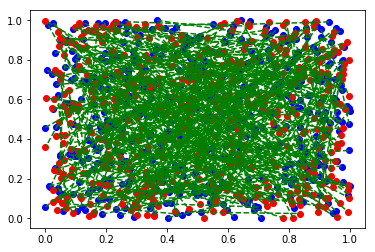

In [1043]:
plt.plot(blue[:,0],blue[:,1], 'bo')
plt.plot(red[:,0],red[:,1], 'ro')

for i in range(n):
    plt.plot([blue[i,0],red[z[i],0]], [blue[i,1],red[z[i],1]], 'g--')

plt.show()

Definindo as funções que serão importantes:

In [1044]:
def perda(x,y):
    return(np.sum(np.sqrt(np.sum((x-y)**2,axis=1))))

In [1045]:
def swap(z):
    x=copy.deepcopy(z)  
    p=random.sample(range(n), 2)
    aux=x[p[0]]
    x[p[0]]=x[p[1]]
    x[p[1]]=aux
    return(x)

In [1046]:
def temp(t,cte=500):
    return(cte/t)

Checando perda inicial:

In [1047]:
perda(blue,red[z])

251.9286996488425

Realizando as iterações até que se atinja uma regra de parada:

In [1048]:
i=1
perdas=[]
ims=[]

while temp(i)>0.001:
    beta=-1/temp(i)
    
    i+=1
    
    c=swap(z)

    A=min(1,np.exp(beta*(perda(blue,red[c])-perda(blue,red[z]))))

    u=np.random.uniform()

    if u<A:
        z=c
    else: pass
    
    perdas.append(perda(blue,red[z]))

Visualizando configuração final do sistema:

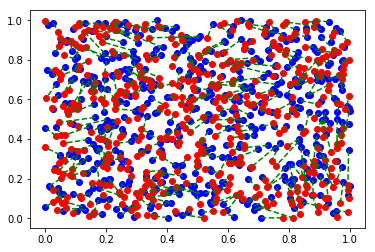

In [1049]:
plt.plot(blue[:,0],blue[:,1], 'bo')
plt.plot(red[:,0],red[:,1], 'ro')

for j in range(n):
    plt.plot([blue[j,0],red[z[j],0]], [blue[j,1],red[z[j],1]], 'g--')

plt.show()

Plot com as iterações no eixo-x e as perdas no eixo-y:

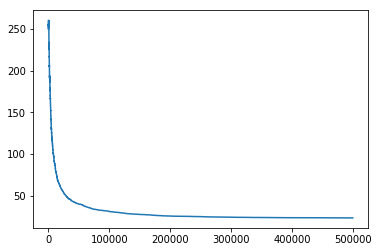

In [1050]:
plt.plot(perdas)
plt.show()

Perda após as iterações:

In [1051]:
perda(blue,red[z])

23.20013820046462